# Data Mining Project  
## Clustering and Classification of Music Moods Using Spotify Audio Features






## Project Overview

This data mining project follows a two-phase approach:
1. Unsupervised learning (Clustering)
2. Supervised learning (Classification)

The goal is to first discover hidden patterns in the data and then use those patterns to build an accurate predictive model.


# 1. Clustering Methods

Two clustering algorithms were applied:

### 1.1 K-Means Clustering
K-Means partitions the data into K clusters by minimizing intra-cluster variance.

### 1.2 Gaussian Mixture Model (GMM)
GMM is a probabilistic clustering method based on Gaussian distributions.



--



# 2. Classification Methods

Two classification algorithms were implemented:

### 2.1 Random Forest
Random Forest is an ensemble method that combines multiple decision trees.

### 2.2 K-Nearest Neighbors (KNN)
KNN predicts labels based on the closest data points.



## Dataset Description

The dataset used in this project is **Spotify Audio Features (April 2019)**.
It contains audio-related features extracted from Spotify tracks and is designed to describe
musical characteristics such as energy, mood, and rhythm.

The dataset includes **130,663 tracks** and **17 attributes**, combining numerical audio features
with basic track metadata. There are no predefined class labels, which makes the dataset suitable
for unsupervised learning techniques such as clustering.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import numpy as np


In [4]:
df=pd.read_csv("/content/sample_data/SpotifyAudioFeaturesApril2019.csv")
df.head(5)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [6]:
df.shape

(130663, 17)

In [7]:
print(df.isna().sum().sort_values(ascending=False))
print(df.duplicated().sum())

track_name          1
artist_name         0
track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64
0


### Dataset Characteristics

- Large-scale dataset with over 130K songs
- Contains continuous numerical features derived from audio analysis
- No missing values in the selected audio features
- No predefined labels (unsupervised learning setting)
- Well-suited for clustering based on music mood and style


<Axes: >

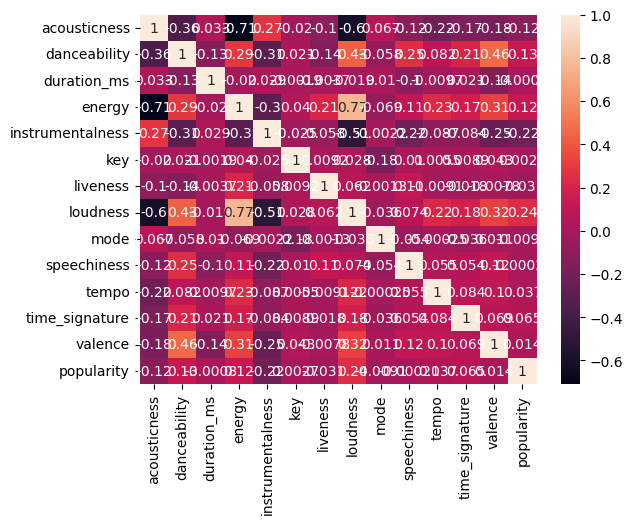

In [5]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)

### Feature Selection for Clustering

Based on the correlation heatmap, a subset of audio features was selected for K-Means clustering.
The chosen features — energy, valence, danceability, acousticness, instrumentalness, and speechiness —
show meaningful relationships with music mood while avoiding strong redundancy between variables.

In [8]:
features = [
    "energy",
    "valence",
    "danceability",
    "acousticness",
    "instrumentalness",
    "speechiness"
]


data = df[features].copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.median(numeric_only=True))

print("Rows, cols:", df.shape)
print("data shape:", data.shape)
display(data.head())

Rows, cols: (130663, 17)
data shape: (130663, 6)


,energy,valence,danceability,acousticness,instrumentalness,speechiness
0,0.339,0.118,0.743,0.005820,0.000,0.4090
1,0.557,0.371,0.846,0.024400,0.000,0.4570
2,0.723,0.382,0.603,0.025000,0.000,0.0454
3,0.579,0.641,0.800,0.029400,0.912,0.0701
4,0.792,0.928,0.783,0.000035,0.878,0.0661


In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
x=data_scaled

print("Scaled shape:", data_scaled.shape)


Scaled shape: (130663, 6)


Text(0, 0.5, 'Inertia')

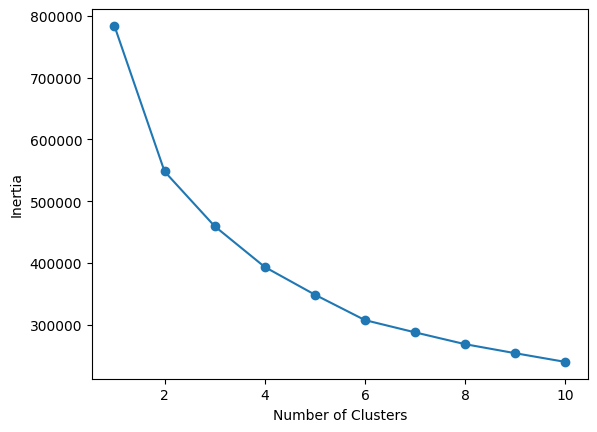

In [98]:

inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)
predicted_cluster_indexes = kmeans.fit_predict(x)


k=3 was chosen instead of k=2 to avoid overly general clustering and to capture more specific music mood groups.


In [23]:
data_scaled_df = pd.DataFrame(data_scaled, columns=features)
data_scaled_df['Cluster'] = predicted_cluster_indexes
data_scaled_df.tail()

,energy,valence,danceability,acousticness,instrumentalness,speechiness,Cluster
130658,0.890490,-0.581408,0.102757,-0.971303,-0.621709,-0.641175,0
130659,-1.230053,-0.361397,-1.023108,1.665030,-0.621709,-0.549481,2
130660,-0.142891,0.410569,0.713039,-0.036166,-0.621709,0.755954,1
130661,-0.227405,-1.405483,1.002396,-0.968062,-0.621709,0.064226,0
130662,0.633105,2.070298,0.702517,0.597443,-0.621709,-0.605784,1


In [24]:
data_scaled_df.groupby('Cluster').mean()
#The cluster means and PCA visualization show clear separation between three distinct groups,
#each representing a different music mood based on audio feature patterns.

,energy,valence,danceability,acousticness,instrumentalness,speechiness
Cluster,,,,,,
0,0.517148,-0.420676,-0.156060,-0.654730,-0.019961,-0.334770
1,0.282503,0.776122,0.689105,-0.219739,-0.428634,0.579361
2,-1.310484,-0.673596,-0.943681,1.420610,0.772991,-0.469858


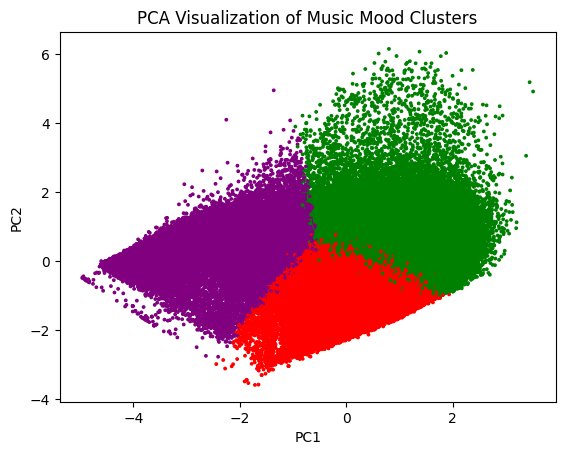

In [109]:
color_map = {
    0: "red",        # Party Mood
    1: "green",      # Night Drive
    2: "purple"      # Acoustic Soul
}

colors = [color_map[c] for c in predicted_cluster_indexes]

plt.scatter(x_pca[:,0], x_pca[:,1], c=colors, s=3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization of Music Mood Clusters")
plt.show()


In [84]:
score=silhouette_score(x_pca,predicted_cluster_indexes)
score

np.float64(0.29922739738178655)

In [110]:
s=davies_bouldin_score(x_pca,predicted_cluster_indexes)
s

np.float64(1.1972674005662522)

## Label Generation

The K-Means cluster assignments were mapped to descriptive labels: Party Mood, Night Drive, and Acoustic Soul.
These labels were used as the target variable in the classification phase.


In [30]:
cluster_mapping={2:"Acoustic Soul",1:"Night Drive",0:"Party Mood"}
data_scaled_df["Cluster_Name"]=data_scaled_df["Cluster"].map(cluster_mapping)
data_scaled_df.head()

,energy,valence,danceability,acousticness,instrumentalness,speechiness,Cluster,Cluster_Name
0,-0.884312,-1.241440,0.849826,-0.974080,-0.621709,2.388752,1,Night Drive
1,-0.046852,-0.264902,1.391714,-0.920325,-0.621709,2.774832,1,Night Drive
2,0.590848,-0.222443,0.113279,-0.918589,-0.621709,-0.535807,0,Party Mood
3,0.037663,0.777254,1.149706,-0.905859,1.909328,-0.337136,1,Night Drive
4,0.855916,1.885026,1.060268,-0.990817,1.814969,-0.369310,1,Night Drive


In [35]:
if 'mask' in locals() and mask is not None:
   df_final = df.iloc[mask.values].copy()
   # Apply the mask to predicted_cluster_indexes
   df_final['Cluster_ID'] = predicted_cluster_indexes[mask.values]
else :
  df_final= df.copy()
  df_final['Cluster_ID'] = predicted_cluster_indexes
df_final['Mood_Label'] = df_final['Cluster_ID'].map(cluster_mapping)

# 4. Display the results
print("Top 10 tracks with their new Mood Labels:")
display(df_final[['artist_name', 'track_name', 'Mood_Label']].head(10))


Top 10 tracks with their new Mood Labels:


,artist_name,track_name,Mood_Label
2,R3HAB,Radio Silence,Party Mood
3,Chris Cooq,Lactose,Night Drive
4,Chris Cooq,Same - Original mix,Night Drive
5,Curbo,Debauchery - Original mix,Night Drive
6,Bingo Play,Grandma - Original mix,Night Drive
8,34 Feet,Among - Original mix,Party Mood
9,Chris Cooq,Hazard - Original mix,Night Drive
10,Jarka,Strummer - Original mix,Night Drive
11,Big Koola,Big Racks - Original mix,Night Drive
12,Scatox,Rulet - Original mix,Night Drive


In [100]:

categories = ['energy', 'valence', 'danceability', 'acousticness', 'instrumentalness', 'speechiness']

fig = go.Figure()

for mood in df_final['Mood_Label'].unique():
    subset = data_scaled_df[data_scaled_df['Cluster_Name'] == mood]
    fig.add_trace(go.Scatterpolar(
        r=subset[categories].mean().values,
        theta=categories,
        fill='toself',
        name=mood
    ))

fig.update_layout(title="Mood Profiles Comparison")
fig.show()

/tmp/ipython-input-3634628725.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




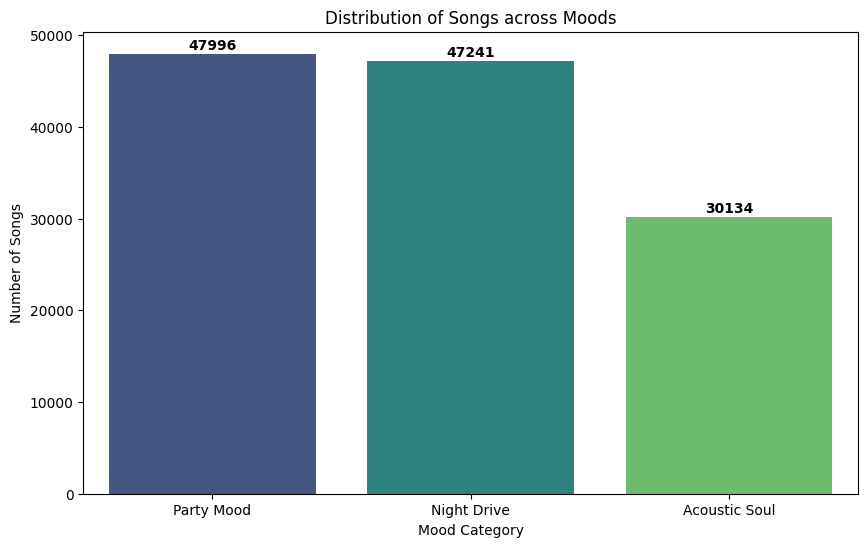

In [101]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Mood_Label', palette='viridis')
plt.title('Distribution of Songs across Moods')
plt.xlabel('Mood Category')
plt.ylabel('Number of Songs')

for i, count in enumerate(df_final['Mood_Label'].value_counts()):
    plt.text(i, count + 500, str(count), ha='center', fontweight='bold')
plt.show()


In [36]:
song_name = "Fepa"
result = df_final[df_final['track_name'].str.contains(song_name, case=False, na=False)].head(1)
if not result.empty:
    print(f"The model classified '{song_name}' as: {result['Mood_Label'].values[0]}")

The model classified 'Fepa' as: Night Drive


In [37]:
df_final.to_csv('Spotify_Clustered_Data.csv', index=False)
# new dataset

#Model2  : GMM

In [102]:
from sklearn.mixture import GaussianMixture


k_gmm = len(np.unique(predicted_cluster_indexes))

gmm = GaussianMixture(
    n_components=k_gmm,
    covariance_type="full",
    random_state=42,
    reg_covar=1e-6,
    init_params="kmeans",
    n_init=3,
    max_iter=500)

gmm_labels = gmm.fit_predict(x)

# Adjust the assignment of gmm_labels based on whether df_final was created using a mask
if "df_final" in globals() and 'mask' in locals() and mask is not None:
    # If df_final was created using a mask, filter gmm_labels with the same mask
    df_final["Cluster_ID_GMM"] = gmm_labels[mask.values]
elif "df_final" in globals():
    # If df_final exists but without a mask (meaning it's a copy of the full df), assign all labels
    df_final["Cluster_ID_GMM"] = gmm_labels
else:
    # If df_final doesn't exist, assume df is the target and assign all labels
    df["Cluster_ID_GMM"] = gmm_labels

rng = np.random.RandomState(42)
n_eval = min(20000, x.shape[0])
idx = rng.choice(x.shape[0], size=n_eval, replace=False)


#Visualization

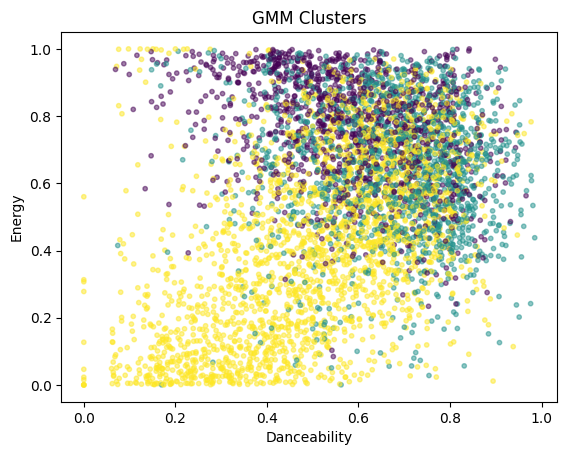

In [104]:
#2d scatter

# Ensure we use the df_final that contains GMM labels
# df_final was created earlier and should contain 'Cluster_ID_GMM'


idx_plot = np.random.choice(df_final.shape[0], size=5000, replace=False)

plt.scatter(
    df_final.iloc[idx_plot]["danceability"],
    df_final.iloc[idx_plot]["energy"],
    c=df_final.iloc[idx_plot]["Cluster_ID_GMM"], # Use GMM labels from df_final
    s=10,
    alpha=0.5
)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("GMM Clusters")
plt.show()


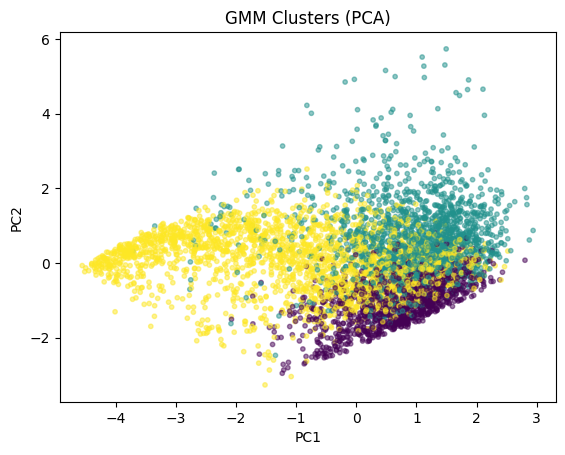

In [105]:
#pca projection


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x)

plt.scatter(
    X_pca[idx_plot, 0],
    X_pca[idx_plot, 1],
    c=gmm_labels[idx_plot],
    s=10,
    alpha=0.5
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("GMM Clusters (PCA)")
plt.show()


The GMM visualization shows overlapping clusters, indicating less clear separation
compared to the K-Means results.


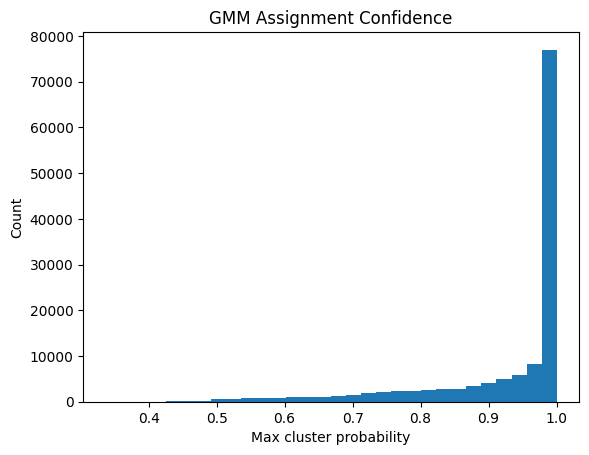

In [44]:
#Probability visualization:show confidence

probs = gmm.predict_proba(x)
max_prob = probs.max(axis=1)

plt.hist(max_prob, bins=30)
plt.title("GMM Assignment Confidence")
plt.xlabel("Max cluster probability")
plt.ylabel("Count")
plt.show()

#The assignment probabilities show that many points have moderate confidence,
#suggesting overlapping cluster boundaries in GMM.


#Evaluation and Comparison

In [45]:

db_kmeans = davies_bouldin_score(x[idx], predicted_cluster_indexes[idx])
db_gmm = davies_bouldin_score(x[idx], gmm_labels[idx])

print("Davies–Bouldin (KMeans):", db_kmeans)
print("Davies–Bouldin (GMM):", db_gmm)
print("Better (lower is better):", "KMeans" if db_kmeans < db_gmm else "GMM")


Davies–Bouldin (KMeans): 1.638701560979759
Davies–Bouldin (GMM): 1.9030982066518407
Better (lower is better): KMeans


In [106]:


rng = np.random.RandomState(42)
n_eval = min(20000, x.shape[0])
idx = rng.choice(x.shape[0], size=n_eval, replace=False)

sil_kmeans = silhouette_score(x[idx], predicted_cluster_indexes[idx])
sil_gmm = silhouette_score(x[idx], gmm_labels[idx])

print("Silhouette (KMeans):", sil_kmeans)
print("Silhouette (GMM):", sil_gmm)


Silhouette (KMeans): 0.21176284341312077
Silhouette (GMM): 0.10548012333289766


In [47]:
print("GMM BIC:", gmm.bic(x))
print("GMM AIC:", gmm.aic(x))


GMM BIC: 1676944.9887319217
GMM AIC: 1676133.2174601373


Gaussian Mixture Model (GMM) was evaluated only for comparison purposes.
AIC and BIC were used to assess model quality; however, KMeans was selected as the final clustering method due to its simplicity and clearer separation.


## Clustering Evaluation

K-Means and GMM were evaluated using the Silhouette Score, Davies–Bouldin Index, and PCA visualization.
K-Means achieved a higher Silhouette Score and a lower Davies–Bouldin Index compared to GMM, indicating more compact and better-separated clusters.
PCA plots also showed clearer visual separation for K-Means, so it was selected as the final clustering method.


In [48]:
print("CLASSIFICATION : \n 1- Random Forest Classifier")


CLASSIFICATION : 
 1- Random Forest Classifier


#####After generating mood labels from K-Means clustering, the problem was transformed into a supervised classification task where the goal is to predict the music mood.


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [51]:
data = pd.read_csv("/content/Spotify_Clustered_Data.csv")
data.head()


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,Cluster_ID,Mood_Label
0,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,0,Party Mood
1,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,1,Night Drive
2,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,1,Night Drive
3,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0,1,Night Drive
4,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0,1,Night Drive


In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125371 entries, 0 to 125370
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       125371 non-null  object 
 1   track_id          125371 non-null  object 
 2   track_name        125370 non-null  object 
 3   acousticness      125371 non-null  float64
 4   danceability      125371 non-null  float64
 5   duration_ms       125371 non-null  int64  
 6   energy            125371 non-null  float64
 7   instrumentalness  125371 non-null  float64
 8   key               125371 non-null  int64  
 9   liveness          125371 non-null  float64
 10  loudness          125371 non-null  float64
 11  mode              125371 non-null  int64  
 12  speechiness       125371 non-null  float64
 13  tempo             125371 non-null  float64
 14  time_signature    125371 non-null  int64  
 15  valence           125371 non-null  float64
 16  popularity        12

In [53]:
X = data.select_dtypes(include=["int64", "float64"])
y = data["Mood_Label"]

print(f"Number of numeric features: {X.shape[1]}")
print("Target label: Mood_Label")
print("\nMood label distribution:")
print(y.value_counts())


Number of numeric features: 15
Target label: Mood_Label

Mood label distribution:
Mood_Label
Party Mood       47996
Night Drive      47241
Acoustic Soul    30134
Name: count, dtype: int64


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape[0]} rows")
print(f"Test size:  {X_test.shape[0]} rows")

print("\nCluster distribution (train):")
print(y_train.value_counts(normalize=True).sort_index())

print("\nCluster distribution (test):")
print(y_test.value_counts(normalize=True).sort_index())


Train size: 100296 rows
Test size:  25075 rows

Cluster distribution (train):
Mood_Label
Acoustic Soul    0.240359
Night Drive      0.376815
Party Mood       0.382827
Name: proportion, dtype: float64

Cluster distribution (test):
Mood_Label
Acoustic Soul    0.240359
Night Drive      0.376790
Party Mood       0.382851
Name: proportion, dtype: float64


In [55]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


In [56]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [57]:
y_pred = rf_model.predict(X_test)


In [59]:
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy = {acc:.4f}")

print("\nInterpretation:")
print("- This accuracy reflects how well the Random Forest reproduces KMeans cluster labels.")
print("- It does NOT represent true clustering accuracy.")
print("- An accuracy of 1.0 indicates that the clusters are highly separable in feature space.")



Accuracy = 1.0000

Interpretation:
- This accuracy reflects how well the Random Forest reproduces KMeans cluster labels.
- It does NOT represent true clustering accuracy.
- An accuracy of 1.0 indicates that the clusters are highly separable in feature space.


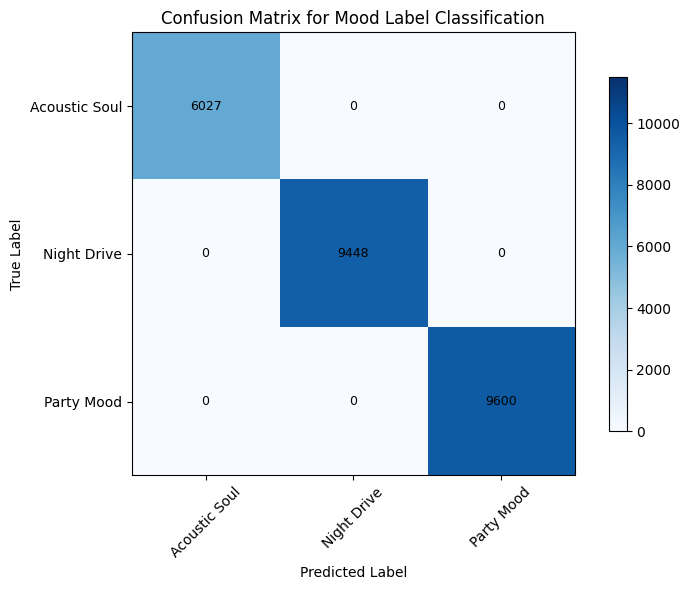

In [60]:
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)

plt.figure(figsize=(8, 6))

plt.imshow(
    cm,
    cmap="Blues",        # lighter than Greys
    vmin=0,
    vmax=cm.max() * 1.2  # softens the color intensity
)

plt.title("Confusion Matrix for Mood Label Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=9)

plt.colorbar(shrink=0.8)
plt.tight_layout()
plt.show()







Random Forest achieved perfect accuracy, indicating that the mood-based clusters
generated by K-Means are highly separable using the selected audio features.
This result reflects how well the model reproduces cluster labels, not true ground-truth accuracy.


In [61]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance.head(10))

print("\nInterpretation:")
print("- These features influenced cluster prediction the most.")
print("- High importance suggests the feature helps separate cluster patterns in the dataset.")


Cluster_ID          0.501978
acousticness        0.111534
energy              0.109113
valence             0.094933
danceability        0.067598
loudness            0.040571
speechiness         0.039842
instrumentalness    0.023332
tempo               0.003187
duration_ms         0.003125
dtype: float64

Interpretation:
- These features influenced cluster prediction the most.
- High importance suggests the feature helps separate cluster patterns in the dataset.


Feature importance analysis shows that energy, acousticness, and valence
are the most influential features in predicting music mood.


In [62]:
new_song = X_test.iloc[0:1]
predicted_cluster = rf_model.predict(new_song)
print(predicted_cluster)


['Acoustic Soul']


In [64]:
print("CLASSIFICATION : \n 1- KNN")

CLASSIFICATION : 
 1- KNN


K-Nearest Neighbors (KNN) was used as a baseline classification model
to compare its performance with Random Forest.


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [67]:
df=pd.read_csv("/content/Spotify_Clustered_Data.csv")
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,Cluster_ID,Mood_Label
0,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,0,Party Mood
1,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,1,Night Drive
2,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,1,Night Drive
3,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,0,1,Night Drive
4,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,0,1,Night Drive


In [68]:
features = [
    'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness',
    'loudness', 'speechiness', 'tempo', 'valence'
]

X = df[features]
y = df['Mood_Label']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [70]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
knn = KNeighborsClassifier(
    n_neighbors=7,
    metric='euclidean'
)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


In [72]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9663808574277168

Classification Report:
                precision    recall  f1-score   support

Acoustic Soul       0.97      0.98      0.97      6027
  Night Drive       0.97      0.96      0.96      9448
   Party Mood       0.96      0.96      0.96      9600

     accuracy                           0.97     25075
    macro avg       0.97      0.97      0.97     25075
 weighted avg       0.97      0.97      0.97     25075



In [85]:
#the next 2 cells are commented out so they dont run again as they take time

param_grid = {'n_neighbors': list(range(3, 22, 2))}

grid = GridSearchCV(
    KNeighborsClassifier(algorithm="kd_tree"),
    param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best K:", grid.best_params_)
print("Best CV F1:", grid.best_score_)

#after running the cross validation Gridesearch to find the best K in range (3,21) the output was the upper bound 21.

Best K: {'n_neighbors': 21}
Best CV F1: 0.9682692751900536


In [86]:
# so we increased the search space for k to search between (21,41)
param_grid = {'n_neighbors': list(range(21, 42, 2))}

grid = GridSearchCV(
    KNeighborsClassifier(algorithm="kd_tree"),
    param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best K:", grid.best_params_)
print("Best CV F1:", grid.best_score_)
# the optimal k found here was 31 so that was selected as the final k.

Best K: {'n_neighbors': 37}
Best CV F1: 0.968636368394975


In [73]:
knn = KNeighborsClassifier(
    n_neighbors=31,
    metric='euclidean'
)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9722831505483549

Classification Report:
                precision    recall  f1-score   support

Acoustic Soul       0.98      0.98      0.98      6027
  Night Drive       0.97      0.97      0.97      9448
   Party Mood       0.97      0.97      0.97      9600

     accuracy                           0.97     25075
    macro avg       0.97      0.97      0.97     25075
 weighted avg       0.97      0.97      0.97     25075



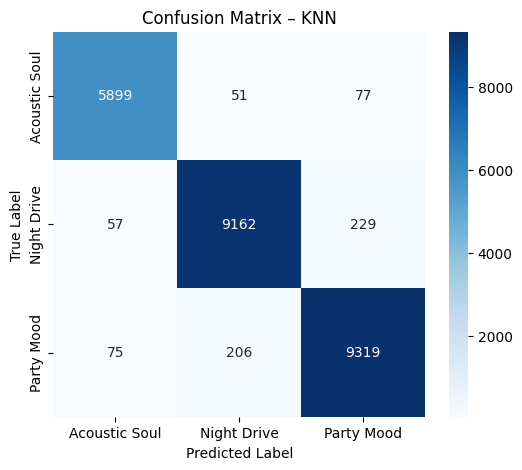

In [108]:

cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – KNN")
plt.show()

####KNN achieved high accuracy but slightly lower performance compared to Random Forest

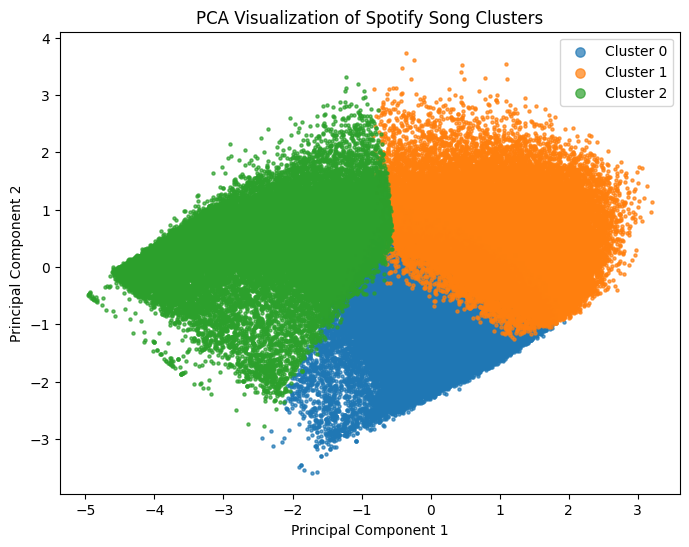

In [96]:


x = data_scaled


X_pca = PCA(n_components=2, random_state=42).fit_transform(x)

plt.figure(figsize=(8, 6))

# The following mask-check is kept as a safety check in case lengths match.
if 'mask' in globals() and mask is not None and len(mask) == len(X_pca):
    X_pca_filtered = X_pca[mask.values]
else:

    print("Warning: 'mask' not found or dimension mismatch. Plotting might be incorrect.")
    X_pca_filtered = X_pca

for cluster_id in sorted(df['Cluster_ID'].unique()):

    idx = (df['Cluster_ID'] == cluster_id).values
    plt.scatter(
        X_pca_filtered[idx, 0],
        X_pca_filtered[idx, 1],
        s=5,
        alpha=0.7,
        label=f"Cluster {cluster_id}"
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Spotify Song Clusters")
plt.legend(markerscale=3)
plt.show()


## Classification Evaluation

Random Forest and K-Nearest Neighbors were evaluated using accuracy, confusion matrices, and classification reports.
Random Forest achieved perfect accuracy on the test set, indicating that the generated K-Means mood labels are highly separable using the available audio features.
KNN also performed well but showed slightly lower performance compared to Random Forest.
Therefore, Random Forest was selected as the final classification model.


 --


# Conclusion

This project applied a hybrid data mining approach combining clustering and classification.
K-Means was selected as the optimal clustering method due to better quantitative evaluation results and clearer PCA separation.
The resulting clusters were mapped to meaningful mood labels and successfully classified using supervised learning.
Random Forest demonstrated the best performance, confirming that the discovered mood-based clusters are well-defined and learnable from audio features.

--

Future work could explore deep learning models or additional mood categories.
